# Face Recognition with Deep Nueral Network

# 1. Data Preprocessing (subtract faces from raw data)

In [ ]:
import cv2 as cv
from PIL import Image

def extractFace(srcpath, dstpath):
    if not os.path.exists(srcpath):
        os.mkdir(srcpath)
    if not os.path.exists(dstpath):
        os.mkdir(dstpath)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    for fname in os.listdir(srcpath):
        img = Image.open(srcpath + fname)
        imgary = cv.imread(srcpath + fname)
        faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
        if len(faces) == 1:
            x,y,w,h = faces[0]
            crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
            crpim.save(dstpath + fname)

In [ ]:
srcpath = 'NiuChenZer/' 
dstpath = 'NiuChenZerFace/'
extractFace(srcpath, dstpath)

# 2. Building Convolutional Neural Network

In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

# 3. Train & Test

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     
                                   zoom_range = 0.2,      
                                   horizontal_flip = True 
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory(
    '/Users/AlexChen/Desktop/Python Dash/training/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 250 images belonging to 3 classes.


In [7]:
test_set = test_datagen.flow_from_directory(
    '/Users/AlexChen/Desktop/Python Dash/testing/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 106 images belonging to 3 classes.


# 4. Recognition

In [66]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=10,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
 1/30 [>.............................] - ETA: 3s - loss: 8.4199e-04 - acc: 1.0000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=10)`
  


30/30 [==============================] - 3s 110ms/step - loss: 0.0287 - acc: 0.9867 - val_loss: 0.5801 - val_acc: 0.8400
Epoch 2/10
30/30 [==============================] - 3s 101ms/step - loss: 0.0132 - acc: 0.9967 - val_loss: 1.2966 - val_acc: 0.8437
Epoch 3/10
30/30 [==============================] - 3s 97ms/step - loss: 0.0140 - acc: 0.9900 - val_loss: 0.9857 - val_acc: 0.8542
Epoch 4/10
30/30 [==============================] - 3s 102ms/step - loss: 0.0147 - acc: 0.9933 - val_loss: 1.4842 - val_acc: 0.8021
Epoch 5/10
30/30 [==============================] - 3s 107ms/step - loss: 0.0747 - acc: 0.9667 - val_loss: 0.8537 - val_acc: 0.8437
Epoch 6/10
30/30 [==============================] - 3s 96ms/step - loss: 0.0487 - acc: 0.9767 - val_loss: 0.7121 - val_acc: 0.8854
Epoch 7/10
30/30 [==============================] - 3s 94ms/step - loss: 0.0172 - acc: 0.9933 - val_loss: 0.6287 - val_acc: 0.8854
Epoch 8/10
30/30 [==============================] - 3s 104ms/step - loss: 0.0373 - acc: 0.

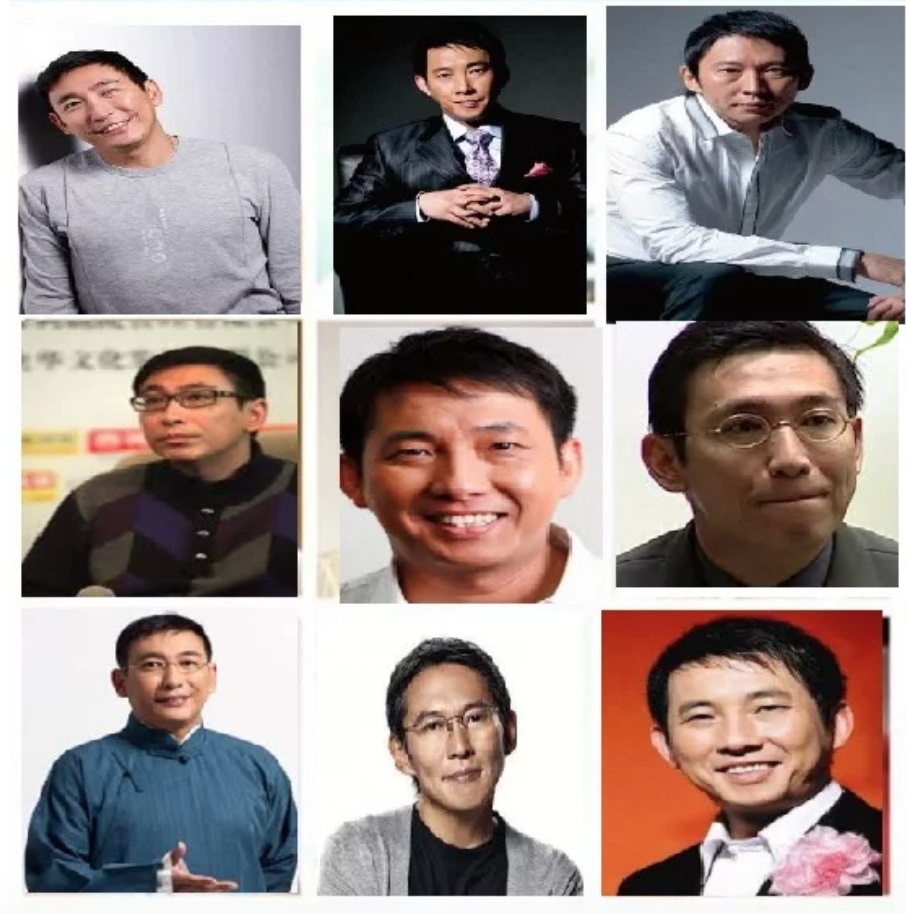

In [67]:
from PIL import Image
im = Image.open('/Users/AlexChen/Desktop/Python Dash/whoami.jpg')
im

In [68]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('/Users/AlexChen/Desktop/Python Dash/haarcascade_frontalface_default.xml')

img = cv.imread('/Users/AlexChen/Desktop/Python Dash/whoami.jpg')
faces = face_cascade.detectMultiScale(img, 1.2, 3)
faces

array([[423,  41,  78,  78],
       [700,  32,  95,  95],
       [125, 361, 102, 102],
       [127, 628,  89,  89],
       [ 46,  59,  93,  93],
       [394, 674, 120, 120],
       [376, 378, 180, 180],
       [655, 646, 166, 166],
       [688, 349, 190, 190]], dtype=int32)

In [69]:
transform_dic = {
    'ChuChungHengFace'  : 'Chu Chung-Heng',
    'NiuChenZerFace'    : 'Niu Chen-Zer',
    'SungShaoChingFace' : 'Sung Shao-Ching'
}
name_dic = {v:transform_dic.get(k) for k,v in training_set.class_indices.items()}
name_dic

{0: 'Chu Chung-Heng', 1: 'Niu Chen-Zer', 2: 'Sung Shao-Ching'}

In [70]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt 
font = cv.FONT_HERSHEY_PLAIN
for x,y,w,h in faces:
    box = (x, y, x+w, y+h)
    crpim = im.crop(box).resize((64,64))
    target_image = image.img_to_array(crpim)
    target_image = np.expand_dims(target_image, axis = 0)
    res = classifier.predict_classes(target_image)[0]
    cv.rectangle(img,(x,y),(x+w,y+h),(14,201,255),2)
    cv.putText(img,name_dic.get(res), (x + int(w/3)-70, y-10), font, 1.5, (14,201,255), 3)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


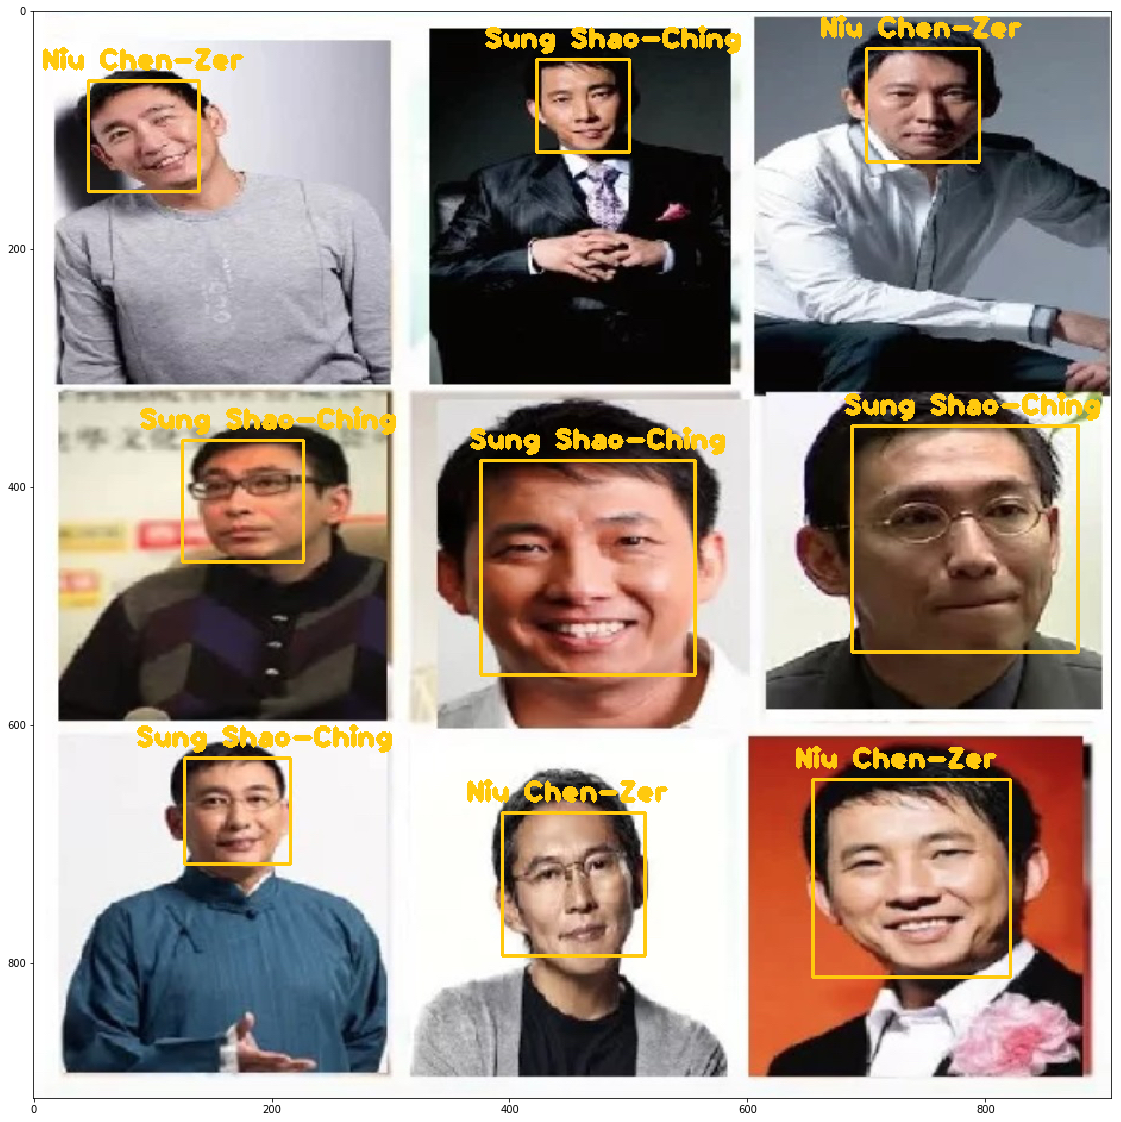

In [71]:
%pylab inline
plt.figure(figsize=(30,20))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))